# Question 1

In [23]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv("train.csv")

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df.Sex.values)
df['Survived'].corr(df['Sex'])

-0.543351380657755

In [27]:
matrix = df.corr()
print(matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.036847 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.077221 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.369226  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.093254 -0.114631   
Age             0.036847 -0.077221 -0.369226  0.093254  1.000000 -0.308247   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.308247  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.189119  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.096067  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex         -0.245489 -0.182333  
Age         -0.189119  0.096067  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

<AxesSubplot:>

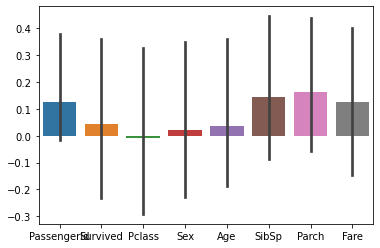

In [45]:
sns.barplot(data=matrix) #BarPlot Visualization for above dataset

<AxesSubplot:ylabel='Count'>

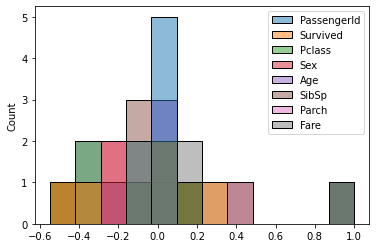

In [46]:
sns.histplot(data=matrix) #Histogram Visualization for above dataset

In [34]:
#NAive bais

train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')

# Join data to analyse and process the set as one.
train_raw['train'] = 1
test_raw['train'] = 0
df = train_raw.append(test_raw, sort=False)




features = ['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']
target = 'Survived'

df = df[features + [target] + ['train']]
# Categorical values need to be transformed into numeric.
df['Sex'] = df['Sex'].replace(["female", "male"], [0, 1])
df['Embarked'] = df['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])
train = df.query('train == 1')
test = df.query('train == 0')


In [35]:

# Drop missing values from the train set.
train.dropna(axis=0, inplace=True)
labels = train[target].values


train.drop(['train', target, 'Pclass'], axis=1, inplace=True)
test.drop(['train', target, 'Pclass'], axis=1, inplace=True)


In [36]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_val, Y_train, Y_val = train_test_split(train, labels, test_size=0.2, random_state=1)

In [37]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

%matplotlib inline
# Suppress warnings
warnings.filterwarnings("ignore")

In [38]:
classifier = GaussianNB()

classifier.fit(X_train, Y_train)

GaussianNB()

In [39]:
y_pred = classifier.predict(X_val)

# Summary of the predictions made by the classifier
print(classification_report(Y_val, y_pred))
print(confusion_matrix(Y_val, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.80        85
         1.0       0.70      0.69      0.70        58

    accuracy                           0.76       143
   macro avg       0.75      0.74      0.75       143
weighted avg       0.75      0.76      0.75       143

[[68 17]
 [18 40]]
accuracy is 0.7552447552447552


# Questioin2

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # current version generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [48]:
glass = pd.read_csv("Glass.csv")

In [49]:
glass.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [50]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [52]:
X = glass.iloc[:, :-1].values
y = glass.iloc[:, -1].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.19      0.44      0.27         9
           2       0.33      0.16      0.21        19
           3       0.33      0.20      0.25         5
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.37        43
   macro avg       0.42      0.47      0.42        43
weighted avg       0.40      0.37      0.36        43

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
accuracy is 0.37209302325581395


In [55]:
# Support Vector Machine's 
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.27      1.00      0.43         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.40        43
   macro avg       0.30      0.50      0.36        43
weighted avg       0.21      0.40      0.26        43

[[ 9  0  0  0  0  0]
 [18  0  0  1  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 1  0  0  0  0  1]
 [ 0  0  0  0  0  6]]
accuracy is 0.3953488372093023


array([[<AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Si'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'Ca'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Fe'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

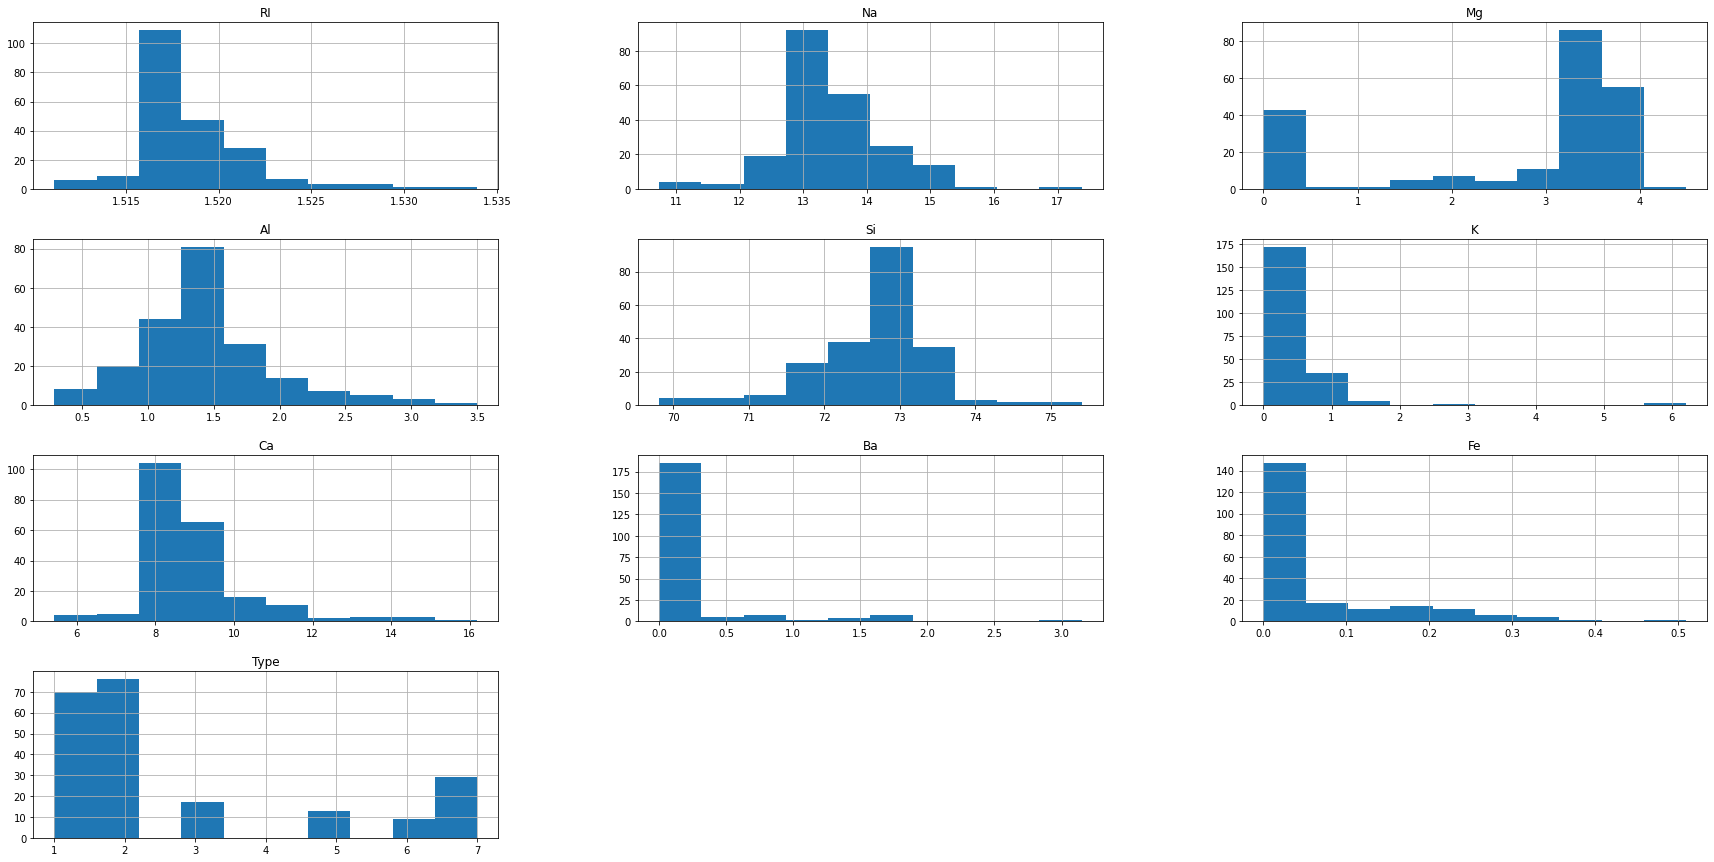

In [56]:
glass.hist(['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'], figsize=(30,15))

In [57]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(10,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

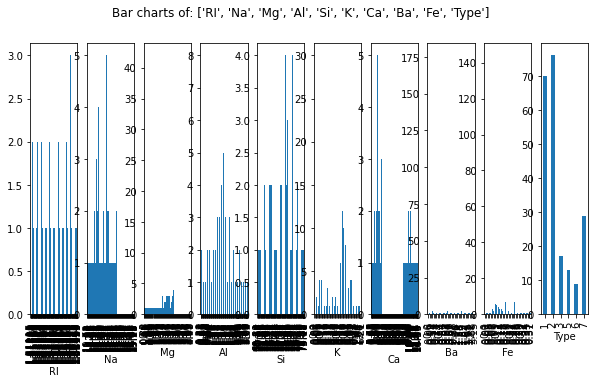

In [58]:
PlotBarCharts(inpData=glass, colsToPlot=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'])

In [59]:
from sklearn.model_selection import cross_val_score
nb =  GaussianNB()
scores = cross_val_score(nb, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.61111111 0.52941176 0.17647059 0.70588235 0.41176471 0.64705882
 0.52941176 0.29411765 0.58823529 0.52941176]
Mean: 0.5022875816993464
Standard Deviation: 0.1554130313188998


In [60]:
from sklearn.model_selection import cross_val_score
nb =  LinearSVC()
scores = cross_val_score(nb, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.66666667 0.58823529 0.47058824 0.52941176 0.64705882 0.52941176
 0.47058824 0.05882353 0.47058824 0.70588235]
Mean: 0.5137254901960785
Standard Deviation: 0.1722367941646882
